# 產生一個金融資料集

In [58]:
import requests
import pandas as pd

In [59]:
url = "https://www.coingecko.com/price_charts/1/usd/max.json"
url_headers = {"user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/72.0.3626.119 Safari/537.36"}
data = requests.get(url, headers = url_headers)
data

<Response [200]>

In [60]:
# 資料為json格式
prices = data.json()['stats']
volumes = data.json()['total_volumes']

In [61]:
prices[0:5]

[[1367107200000, 135.3],
 [1367193600000, 141.96],
 [1367280000000, 135.3],
 [1367366400000, 117.0],
 [1367452800000, 103.43]]

In [62]:
DF_Price = pd.DataFrame(prices)
DF_Volume = pd.DataFrame(volumes)

In [63]:
DF_Price.head()

,0,1
0,1367107200000,135.30
1,1367193600000,141.96
2,1367280000000,135.30
3,1367366400000,117.00
4,1367452800000,103.43


In [64]:
DF_Volume.head()

,0,1
0,1367107200000,0.0
1,1367193600000,0.0
2,1367280000000,0.0
3,1367366400000,0.0
4,1367452800000,0.0


In [65]:
Open = [DF_Price[1][0]]

In [66]:
Open.extend(DF_Price[1][0:-1])

In [67]:
Close = list(DF_Price[1][:])

In [68]:
print(len(Open), len(Close))

2272 2272


In [69]:
Max = [max(o, c) for o, c in zip(Open, Close)]

In [70]:
Min = [min(o, c) for o, c in zip(Open, Close)]

In [71]:
print(len(Open), len(Close), len(Max), len(Min))

2272 2272 2272 2272


In [77]:
Date = list(DF_Volume[0])
Volume = list(DF_Volume[1])

In [78]:
print(len(Date), len(Open), len(Max), len(Min), len(Close), len(Volume))

2272 2272 2272 2272 2272 2272


In [79]:
df = pd.DataFrame(prices)
df.head()

,0,1
0,1367107200000,135.30
1,1367193600000,141.96
2,1367280000000,135.30
3,1367366400000,117.00
4,1367452800000,103.43


In [80]:
df['Open'] = Open
df['Max'] = Max
df['Min'] = Min
df['Volume'] = Volume
df.head(10)

,0,1,Open,Max,Min,Volume
0,1367107200000,135.30,135.30,135.30,135.30,0.0
1,1367193600000,141.96,135.30,141.96,135.30,0.0
2,1367280000000,135.30,141.96,141.96,135.30,0.0
3,1367366400000,117.00,135.30,135.30,117.00,0.0
4,1367452800000,103.43,117.00,117.00,103.43,0.0
5,1367539200000,91.01,103.43,103.43,91.01,0.0
6,1367625600000,111.25,91.01,111.25,91.01,0.0
7,1367712000000,116.79,111.25,116.79,111.25,0.0
8,1367798400000,118.33,116.79,118.33,116.79,0.0
9,1367884800000,106.40,118.33,118.33,106.40,0.0


In [81]:
df.columns = ['Date','Close', 'Open','High','Low','Volume']
df.head(10)

,Date,Close,Open,High,Low,Volume
0,1367107200000,135.30,135.30,135.30,135.30,0.0
1,1367193600000,141.96,135.30,141.96,135.30,0.0
2,1367280000000,135.30,141.96,141.96,135.30,0.0
3,1367366400000,117.00,135.30,135.30,117.00,0.0
4,1367452800000,103.43,117.00,117.00,103.43,0.0
5,1367539200000,91.01,103.43,103.43,91.01,0.0
6,1367625600000,111.25,91.01,111.25,91.01,0.0
7,1367712000000,116.79,111.25,116.79,111.25,0.0
8,1367798400000,118.33,116.79,118.33,116.79,0.0
9,1367884800000,106.40,118.33,118.33,106.40,0.0


In [82]:
cols = df.columns.tolist()
print("befor: ", cols)
cols = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
print("after: ", cols)

befor:  ['Date', 'Close', 'Open', 'High', 'Low', 'Volume']
after:  ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']


In [83]:
# 重排DataFrame的column順序
df = df[cols]
df.head(10)

,Date,Open,High,Low,Close,Volume
0,1367107200000,135.30,135.30,135.30,135.30,0.0
1,1367193600000,135.30,141.96,135.30,141.96,0.0
2,1367280000000,141.96,141.96,135.30,135.30,0.0
3,1367366400000,135.30,135.30,117.00,117.00,0.0
4,1367452800000,117.00,117.00,103.43,103.43,0.0
5,1367539200000,103.43,103.43,91.01,91.01,0.0
6,1367625600000,91.01,111.25,91.01,111.25,0.0
7,1367712000000,111.25,116.79,111.25,116.79,0.0
8,1367798400000,116.79,118.33,116.79,118.33,0.0
9,1367884800000,118.33,118.33,106.40,106.40,0.0


In [84]:
df['Date'] = pd.to_datetime(df['Date'], unit='ms')
df.index = df['Date']
df.head(10)

,Date,Open,High,Low,Close,Volume
Date,,,,,,
2013-04-28,2013-04-28,135.30,135.30,135.30,135.30,0.0
2013-04-29,2013-04-29,135.30,141.96,135.30,141.96,0.0
2013-04-30,2013-04-30,141.96,141.96,135.30,135.30,0.0
2013-05-01,2013-05-01,135.30,135.30,117.00,117.00,0.0
2013-05-02,2013-05-02,117.00,117.00,103.43,103.43,0.0
2013-05-03,2013-05-03,103.43,103.43,91.01,91.01,0.0
2013-05-04,2013-05-04,91.01,111.25,91.01,111.25,0.0
2013-05-05,2013-05-05,111.25,116.79,111.25,116.79,0.0
2013-05-06,2013-05-06,116.79,118.33,116.79,118.33,0.0


In [85]:
df.tail(10)

,Date,Open,High,Low,Close,Volume
Date,,,,,,
2019-07-10 00:00:00.000,2019-07-10 00:00:00.000,12260.282698,12544.167262,12260.282698,12544.167262,3.588534e+10
2019-07-11 00:00:00.000,2019-07-11 00:00:00.000,12544.167262,12544.167262,12166.398289,12166.398289,4.216363e+10
2019-07-12 00:00:00.000,2019-07-12 00:00:00.000,12166.398289,12166.398289,11385.060491,11385.060491,3.706186e+10
2019-07-13 00:00:00.000,2019-07-13 00:00:00.000,11385.060491,11804.562794,11385.060491,11804.562794,3.007855e+10
2019-07-14 00:00:00.000,2019-07-14 00:00:00.000,11804.562794,11804.562794,11418.511855,11418.511855,2.848505e+10
2019-07-15 00:00:00.000,2019-07-15 00:00:00.000,11418.511855,11418.511855,10285.461109,10285.461109,2.985757e+10
2019-07-16 00:00:00.000,2019-07-16 00:00:00.000,10285.461109,10911.345158,10285.461109,10911.345158,3.755315e+10
2019-07-17 00:00:00.000,2019-07-17 00:00:00.000,10911.345158,10911.345158,9538.827124,9538.827124,3.440982e+10
2019-07-18 00:00:00.000,2019-07-18 00:00:00.000,9538.827124,9657.303101,9538.827124,9657.303101,3.332838e+10


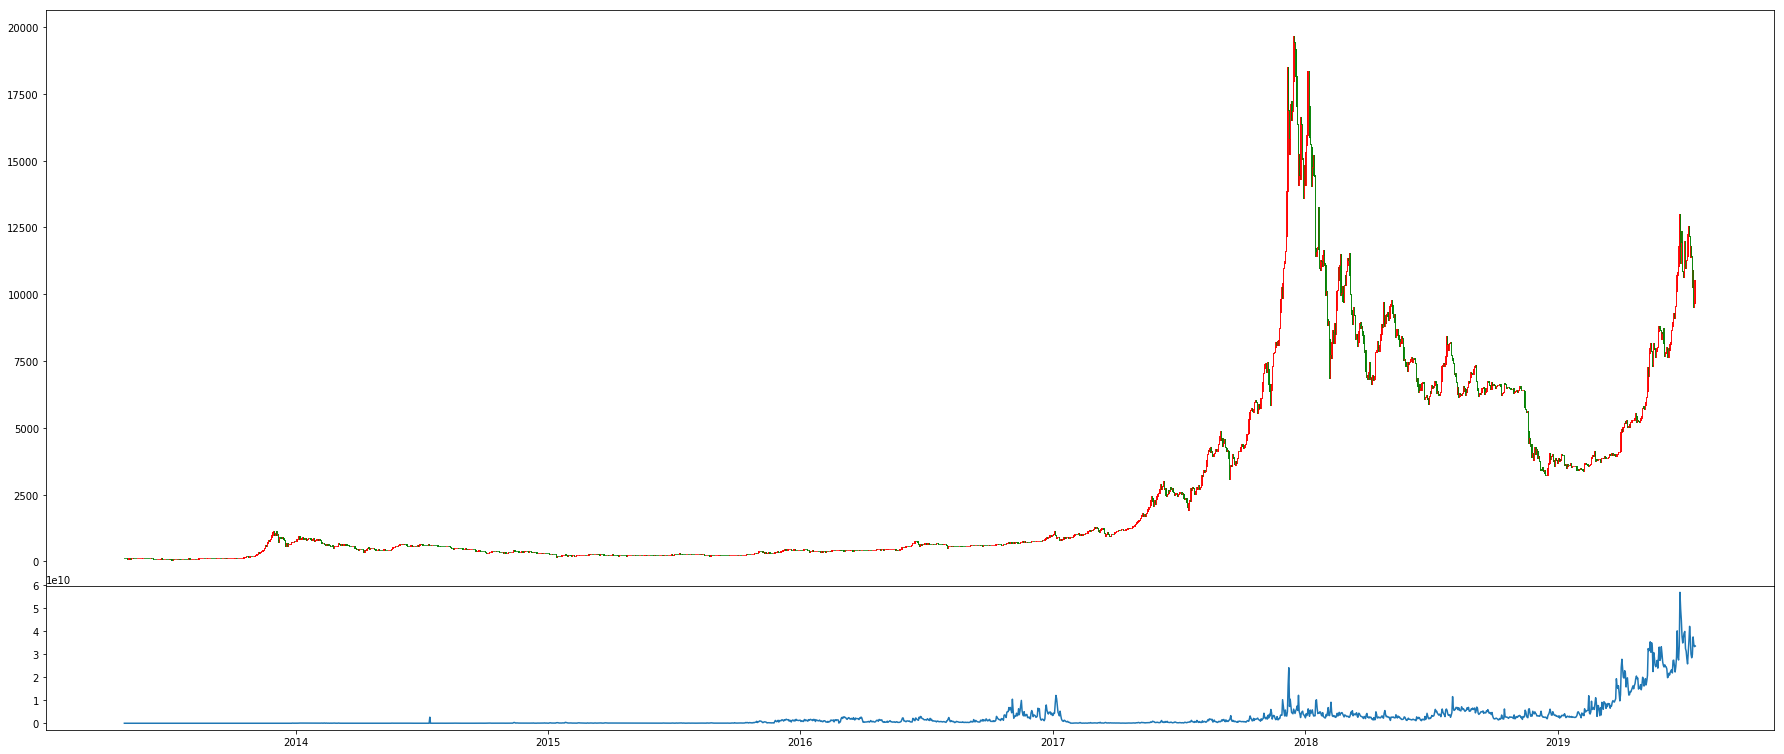

In [87]:
import matplotlib.pyplot as plt
import mpl_finance as mpf
%matplotlib inline

fig = plt.figure(figsize=(24, 20))
ax = fig.add_axes([0,0.3,1,0.4])
ax2 = fig.add_axes([0,0.2,1,0.1])

ax.set_xticks(range(0, len(df.index), 100))
ax.set_xticklabels(df.index[::100])
mpf.candlestick2_ochl(ax, df['Open'], df['Close'], df['High'],
                      df['Low'], width=0.6, colorup='r', colordown='g', alpha=0.75)
ax2.plot(df['Volume'])


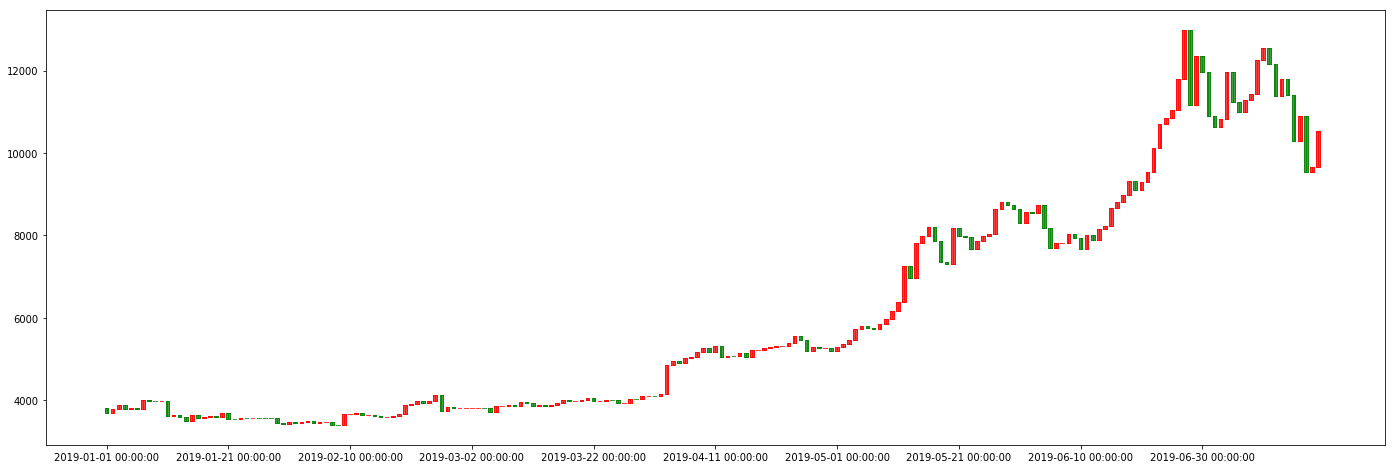

In [88]:
df2 = df[df['Date'] >= '2019-01-01']
fig = plt.figure(figsize=(24, 8))

ax = fig.add_subplot(1, 1, 1)
ax.set_xticks(range(0, len(df2.index), 20))
ax.set_xticklabels(df2.index[::20])
mpf.candlestick2_ochl(ax, df2['Open'], df2['Close'], df2['High'], 
                      df2['Low'], width=0.6, colorup='r', colordown='g', alpha=0.75); 